# **Data Preprocessing - Before Building Machine Learning Model**
---
---

This notebook performs a complete data preprocessing pipeline for the Breast Cancer Dataset.


---
---

### **STEP 1:**
We import essential libraries for data manipulation, visualization and preprocessing.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

### **STEP 2:**
We load the dataset which contains measurements derived from images of fine needle aspirates of breast masses along with 30 numerical features.

In [59]:
bc_df = pd.read_csv('~/Assignment-2/data/breast_cancer.csv')

# head
print("--------------\n", "Breast Cancer DataSet", "\n--------------")
display(bc_df.head())

print('--------------\n')
# tail
display(bc_df.tail())

--------------
 Breast Cancer DataSet 
--------------


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,2,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,3,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,4,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,5,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584


--------------



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
507,508,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
508,509,B,14.20,20.53,92.41,NaN,0.08931,0.11080,0.05063,NaN,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
509,510,M,13.86,16.93,90.96,578.9,0.10260,0.15170,NaN,0.05602,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590
510,511,M,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,...,19.85,25.09,130.90,1222.0,0.1416,0.2405,0.33780,0.18570,0.3138,0.08113
511,512,M,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.39480,NaN,0.3589,0.09187


In [60]:
# Drop unnecessary columns
bc_df.drop(columns=['id'], inplace=True)


### **STEP 3:**
Sanity Check.
We check dimensions, data types and null values and also look for duplicate and garbage values to understand data integrity.

In [61]:
#shape
print("Breast Cancer Dataset Shape: ", bc_df.shape)

#info
print("\nBreast Cancer Dataset Info:")
bc_df.info()
print("\n")

#finding missing values
print("Breast Cancer Dataset Missing Values:", bc_df.isnull().sum())
print("\n")

#checking for duplicates
print("Breast Cancer Dataset Duplicates: ", bc_df.duplicated().sum())

Breast Cancer Dataset Shape:  (512, 31)

Breast Cancer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                512 non-null    object 
 1   radius_mean              505 non-null    float64
 2   texture_mean             507 non-null    float64
 3   perimeter_mean           507 non-null    float64
 4   area_mean                508 non-null    float64
 5   smoothness_mean          506 non-null    float64
 6   compactness_mean         511 non-null    float64
 7   concavity_mean           502 non-null    float64
 8   concave points_mean      504 non-null    float64
 9   symmetry_mean            507 non-null    float64
 10  fractal_dimension_mean   509 non-null    float64
 11  radius_se                510 non-null    float64
 12  texture_se               505 non-null    float64
 13  perimeter_s

In [62]:
#identifying garbage values in object columns
print("Breast Cancer Dataset Garbage Values:")
for col in bc_df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {bc_df[col].value_counts()}")

Breast Cancer Dataset Garbage Values:
Unique values in diagnosis: diagnosis
B    321
M    191
Name: count, dtype: int64


In [63]:
# Check for unusual patterns in numeric columns (without printing cause the output is too long)
# We store summary stats so we could log them if needed
negative_values = {}
for col in bc_df.select_dtypes(include='number').columns:
    negative_entries = bc_df[bc_df[col] < 0][col]
    if not negative_entries.empty:
        negative_values[col] = negative_entries
print("Negative values in Breast Cancer Dataset:")
print(negative_values.keys())

Negative values in Breast Cancer Dataset:
dict_keys([])


### **STEP 4:**
EDA - Exploratory Data Analysis


In [64]:
# Summary statistics
print("Summary Statistics of Breast Cancer Dataset:\n", bc_df.describe().T)

Summary Statistics of Breast Cancer Dataset:
                          count        mean         std         min  \
radius_mean              505.0   14.173550    3.553790    6.981000   
texture_mean             507.0   19.364142    4.314426    9.710000   
perimeter_mean           507.0   92.231933   24.584304   43.790000   
area_mean                508.0  657.616929  357.110765  143.500000   
smoothness_mean          506.0    0.096168    0.014208    0.062510   
compactness_mean         511.0    0.103624    0.053119    0.019380   
concavity_mean           502.0    0.088031    0.080220    0.000000   
concave points_mean      504.0    0.048893    0.039362    0.000000   
symmetry_mean            507.0    0.181339    0.027501    0.106000   
fractal_dimension_mean   509.0    0.062667    0.006864    0.050240   
radius_se                510.0    0.408586    0.285297    0.111500   
texture_se               505.0    1.218821    0.562474    0.360200   
perimeter_se             511.0    2.902710  

In [65]:
# Define a function to calculate whisker bounds for IQR outlier detection
def whisker(col):
    q1, q3 = np.percentile(col.dropna(), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

In [66]:
# Detect outliers using IQR method
iqr_outliers = {}
for col in bc_df.select_dtypes(include='number').columns:
    lower, upper = whisker(bc_df[col])
    outliers = bc_df[(bc_df[col] < lower) | (bc_df[col] > upper)][col]
    if not outliers.empty:
        iqr_outliers[col] = outliers
print("Detected outliers (IQR-based):")
for col, values in iqr_outliers.items():
    print(f"{col}: {len(values)} outliers")

Detected outliers (IQR-based):
radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 24 outliers
smoothness_mean: 5 outliers
compactness_mean: 15 outliers
concavity_mean: 17 outliers
concave points_mean: 9 outliers
symmetry_mean: 14 outliers
fractal_dimension_mean: 12 outliers
radius_se: 33 outliers
texture_se: 18 outliers
perimeter_se: 35 outliers
area_se: 60 outliers
smoothness_se: 24 outliers
compactness_se: 24 outliers
concavity_se: 26 outliers
concave points_se: 19 outliers
symmetry_se: 25 outliers
fractal_dimension_se: 25 outliers
radius_worst: 12 outliers
texture_worst: 4 outliers
perimeter_worst: 13 outliers
area_worst: 23 outliers
smoothness_worst: 3 outliers
compactness_worst: 18 outliers
concavity_worst: 11 outliers
symmetry_worst: 20 outliers
fractal_dimension_worst: 21 outliers


### **STEP 5:**
Missing value treatment.

In [ ]:
# Apply KNN imputer only to feature columns 

# Assuming 'diagnosis' is the target variable and should not be imputed
# Isolate feature columns 
feature_columns = bc_df.columns.difference(['id', 'diagnosis'])
features_bc = bc_df[feature_columns]

# Initialize KNN imputer
impute = KNNImputer()

# Impute numeric values
bc_df[feature_columns] = impute.fit_transform(features_bc)
print("Breast Cancer Dataset Missing Values:", bc_df.isnull().sum())

Breast Cancer Dataset Missing Values: diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### **STEP 6:**
We check for class imbalance in the diagnosis labels.

In [68]:
# Class distribution
print(bc_df['diagnosis'].value_counts())
print(bc_df['diagnosis'].value_counts(normalize=True) * 100)

diagnosis
B    321
M    191
Name: count, dtype: int64
diagnosis
B    62.695312
M    37.304688
Name: proportion, dtype: float64


### **STEP 7:**

To address the presence of extreme values without discarding biologically important data, we applied a logarithmic transformation (`log1p`) only to features that were both right-skewed (skewness > 1) and contained outliers based on the IQR method. This targeted transformation reduces the influence of outliers and improves feature distribution symmetry while preserving the interpretability and structure of the original data.

In [69]:
skew_vals = bc_df[feature_columns].skew().sort_values(ascending=False)
skewed_cols = skew_vals[skew_vals > 1].index.tolist()

outlier_cols = list(iqr_outliers.keys())
cols_to_log = list(set(skewed_cols).intersection(outlier_cols))

bc_df_log = bc_df.copy()
for col in cols_to_log:
    bc_df_log[col] = np.log1p(bc_df_log[col])

### **STEP 8:**
Drop duplicates or gargabe rows. 
As confirmed in the earlier sanity checks, there are no duplicate or invalid rows in the dataset. Therefore, no rows need to be removed at this stage.

### **STEP 9:**
Scaling.
We will apply `RobustScaler` to scale features using median and IQR, so outliers don't dominate. This method is often preferred after `log1p()` transformation.

In [70]:
# Scale the feature columns using StandardScaler
scaler = RobustScaler()
scaled_bc = pd.DataFrame(scaler.fit_transform(bc_df_log[feature_columns]), columns=feature_columns)


# Add back the 'diagnosis' column
scaled_bc['diagnosis'] = bc_df['diagnosis']



### **STEP 9:**
Visualization of data.

1. We visualize the distributions of the features using boxplots
2. We create a heatmap of the Pearson correlation coefficients among features
3. We apply Principal Component Analysis (PCA) and visualize the first two components colored by class

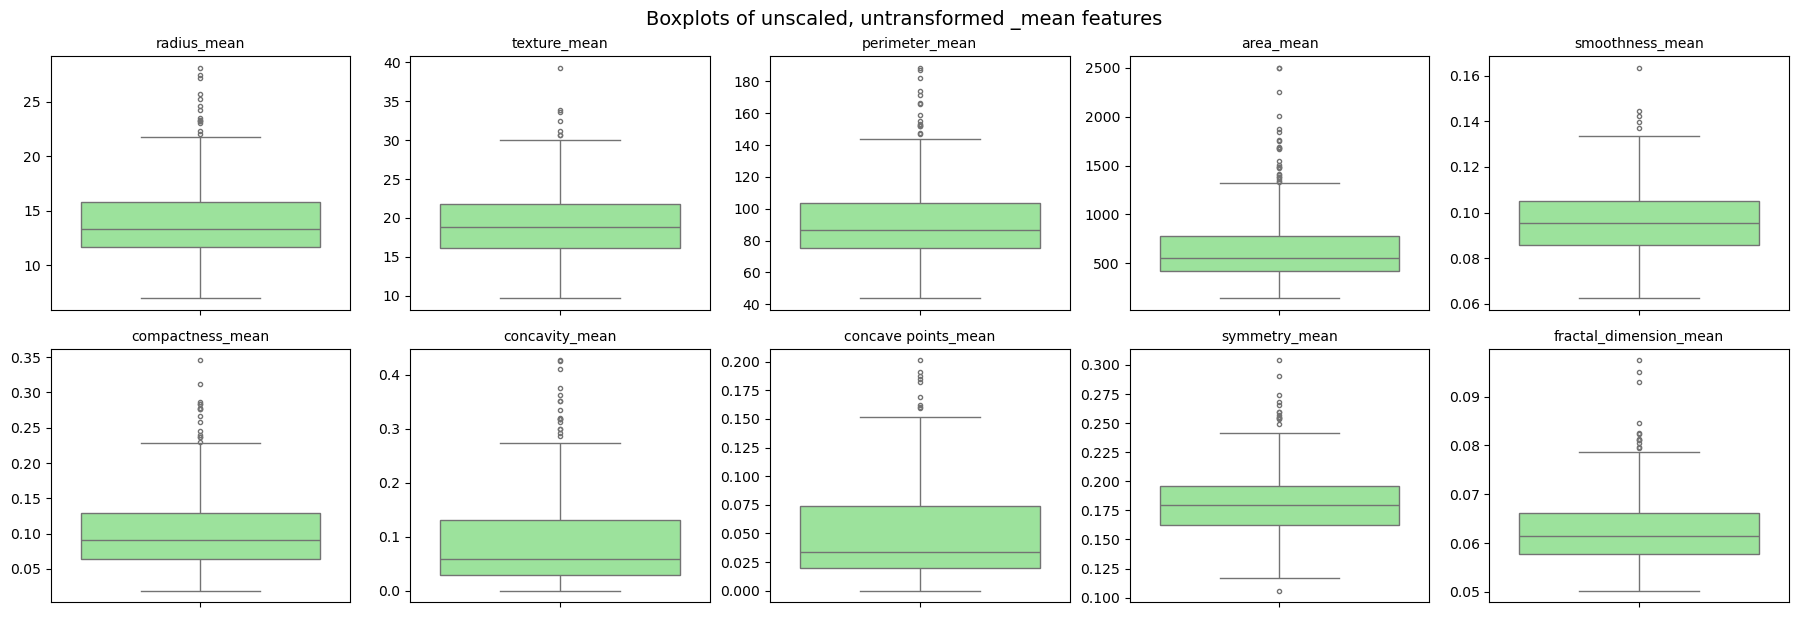

In [71]:
# List of _mean features
mean_features = [col for col in bc_df.columns if '_mean' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(mean_features):
    sns.boxplot(y=bc_df[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of unscaled, untransformed _mean features", fontsize=14, y=1.02)
plt.show()


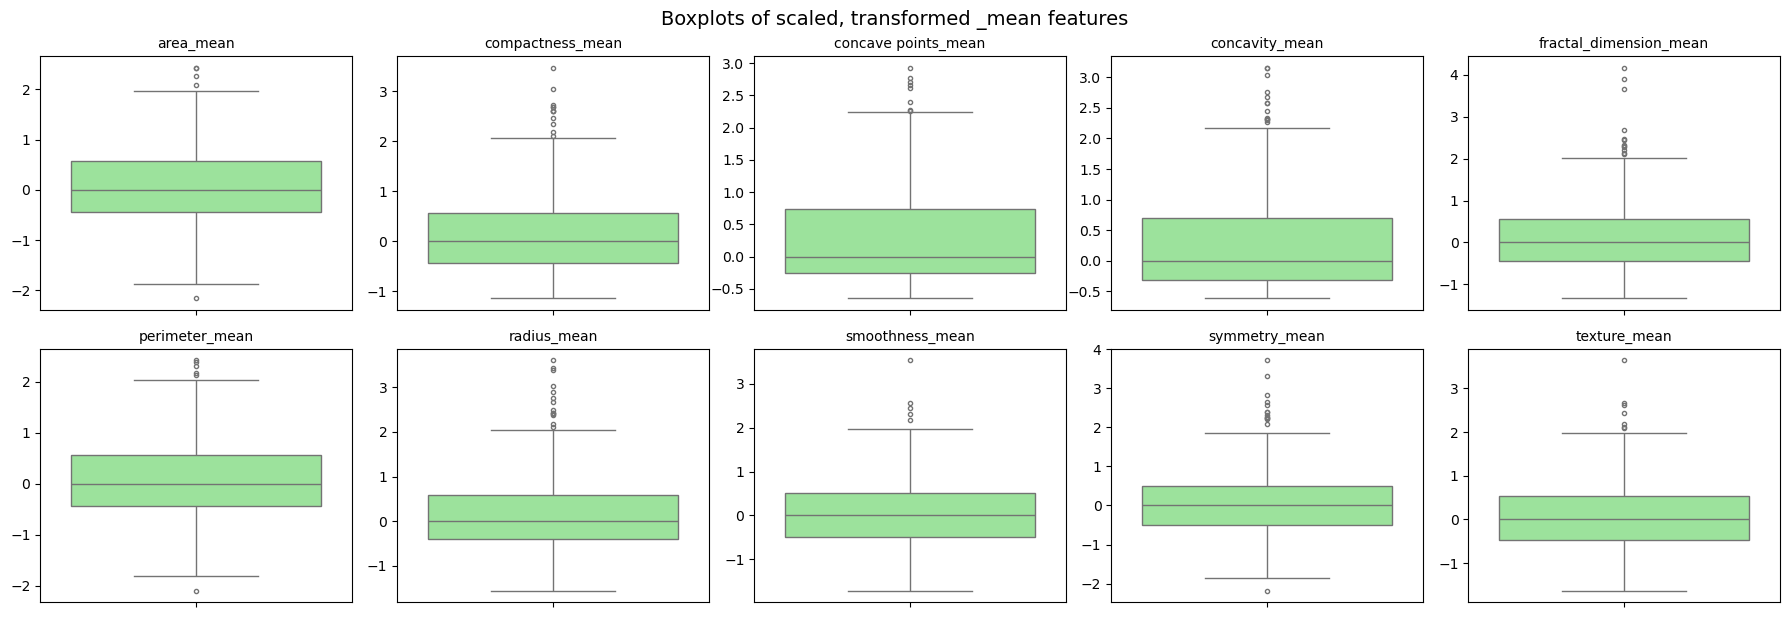

In [72]:
# List of _mean features
mean_features = [col for col in scaled_bc.columns if '_mean' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(mean_features):
    sns.boxplot(y=scaled_bc[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of scaled, transformed _mean features", fontsize=14, y=1.02)
plt.show()


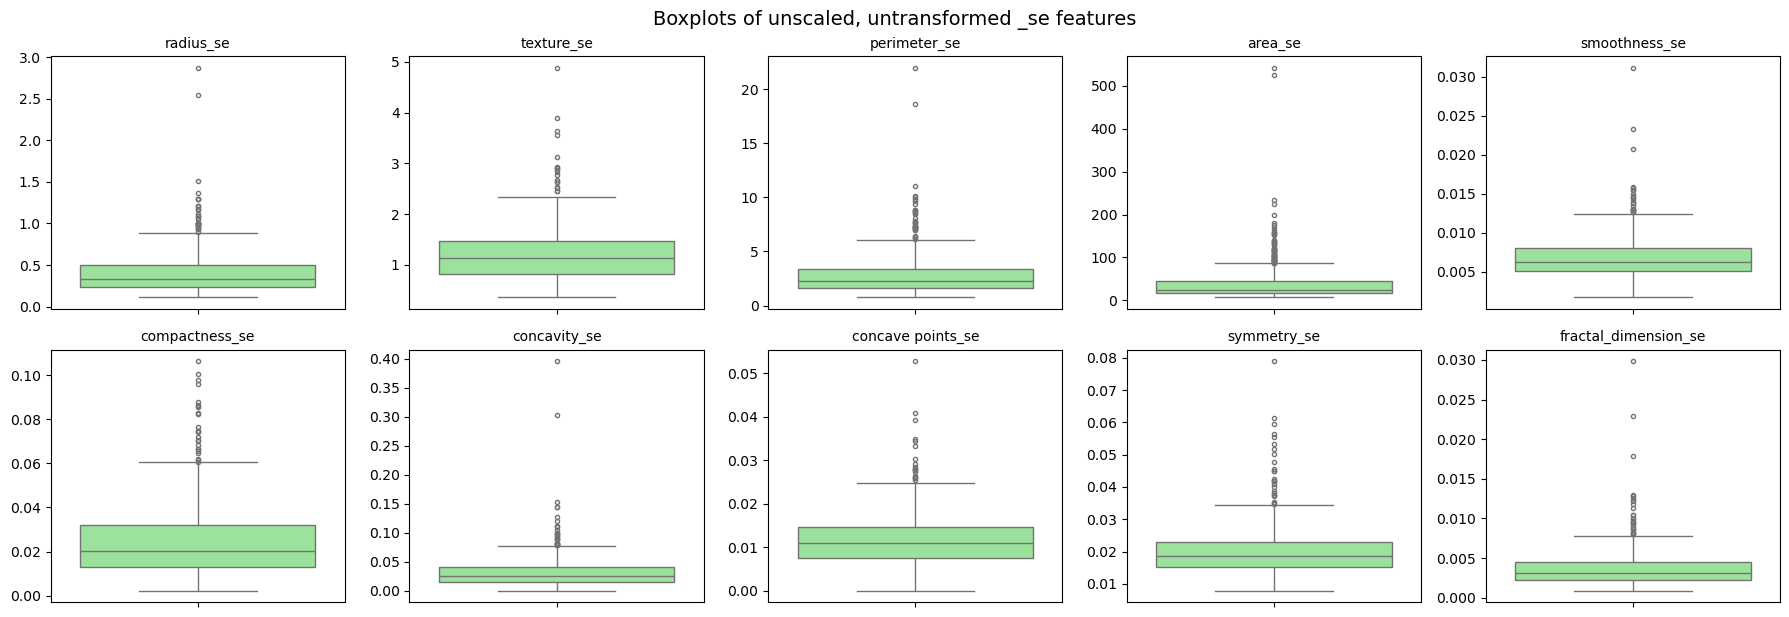

In [73]:
# List of _se features
se_features = [col for col in bc_df.columns if '_se' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(se_features):
    sns.boxplot(y=bc_df[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of unscaled, untransformed _se features", fontsize=14, y=1.02)
plt.show()


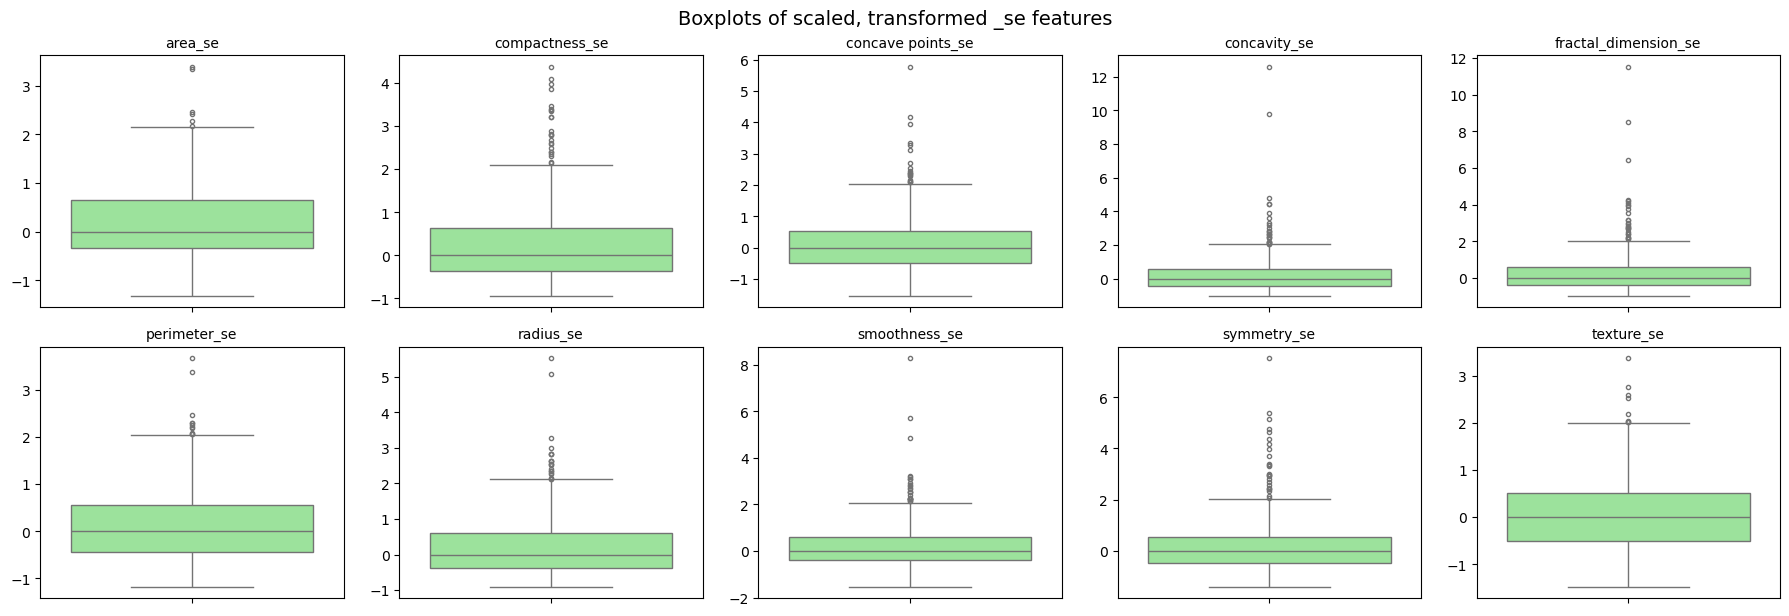

In [74]:
# List of _se features
se_features = [col for col in scaled_bc.columns if '_se' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(se_features):
    sns.boxplot(y=scaled_bc[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of scaled, transformed _se features", fontsize=14, y=1.02)
plt.show()


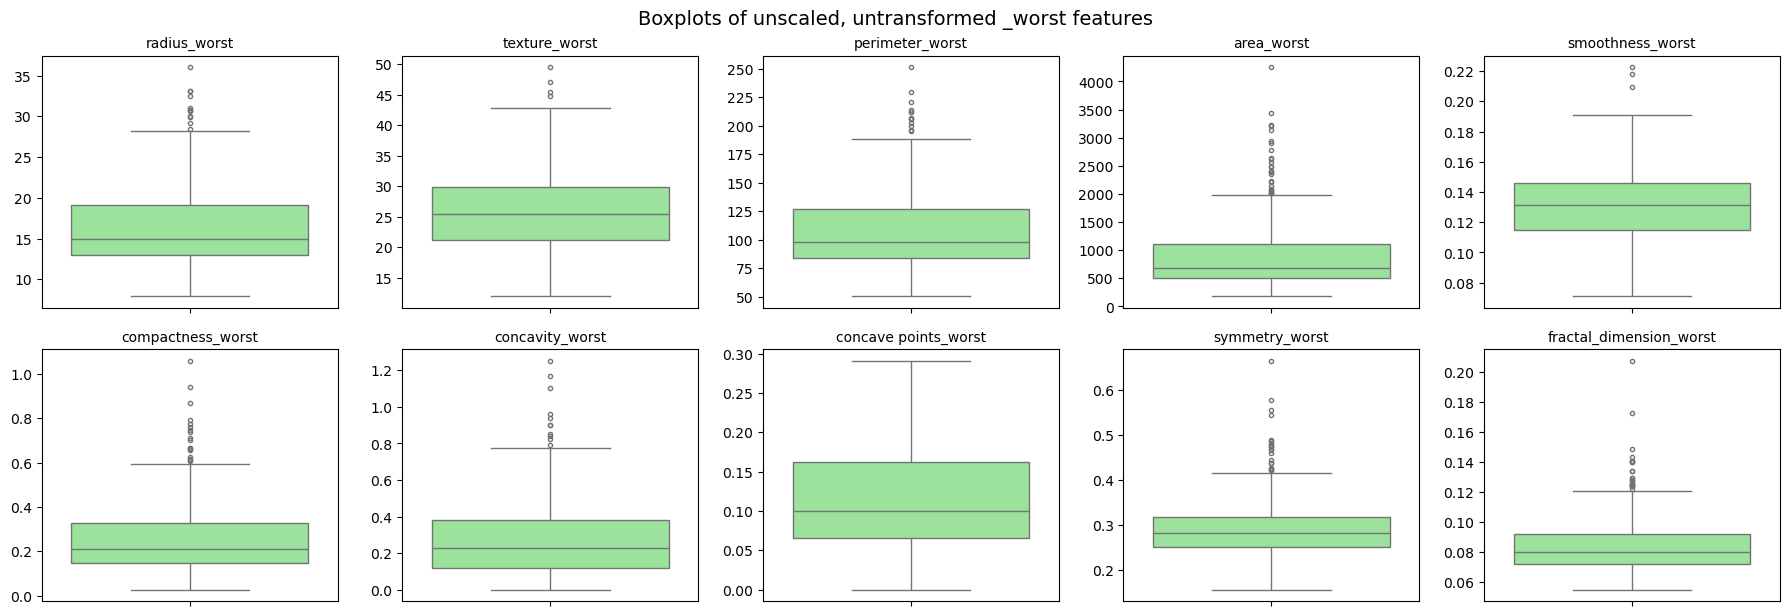

In [75]:
# List of _worst features
worst_features = [col for col in bc_df.columns if '_worst' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(worst_features):
    sns.boxplot(y=bc_df[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of unscaled, untransformed _worst features", fontsize=14, y=1.02)
plt.show()


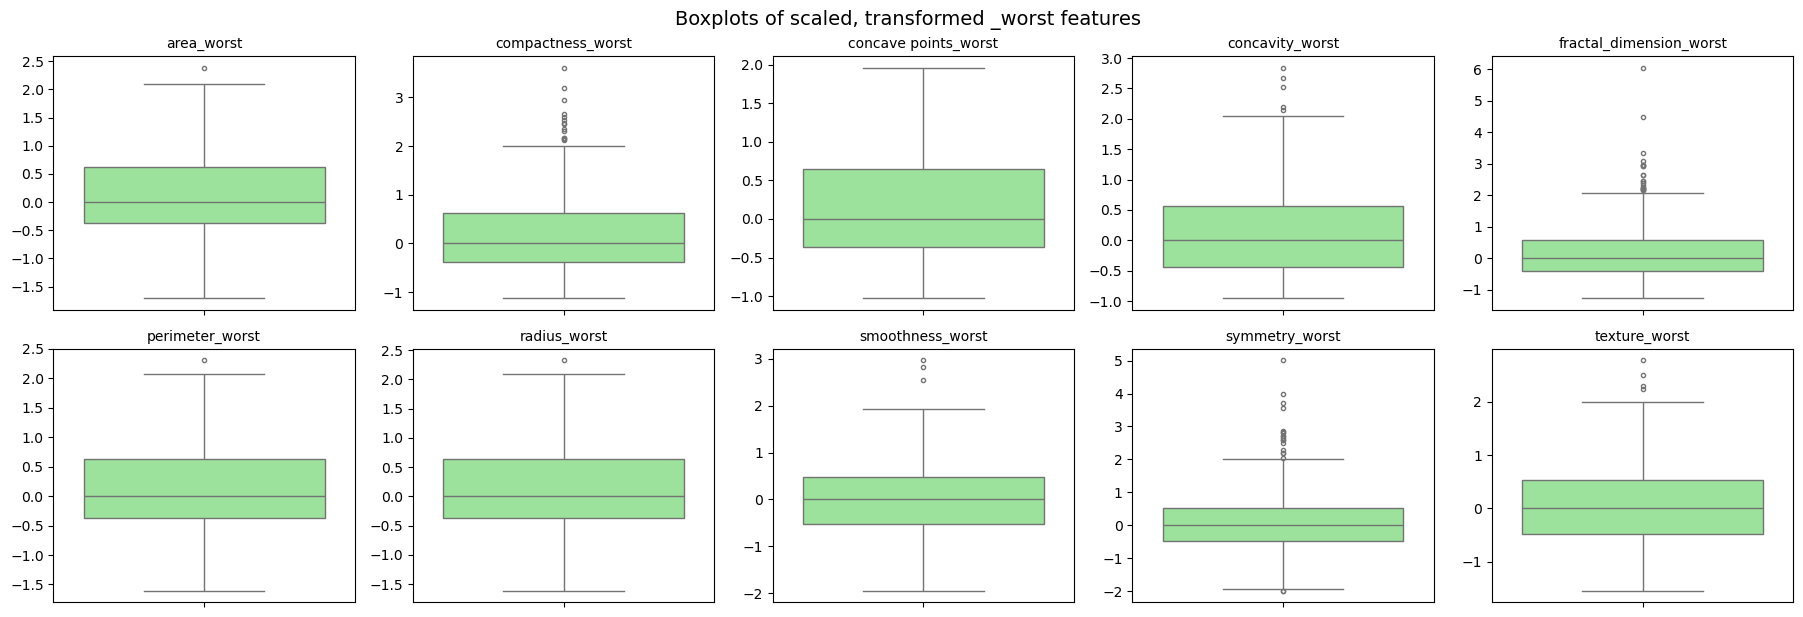

In [76]:
# List of _worst features
worst_features = [col for col in scaled_bc.columns if '_worst' in col]

# Set up the 2x5 plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(worst_features):
    sns.boxplot(y=scaled_bc[col], ax=axes[i], color="lightgreen", fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplots of scaled, transformed _worst features", fontsize=14, y=1.02)
plt.show()


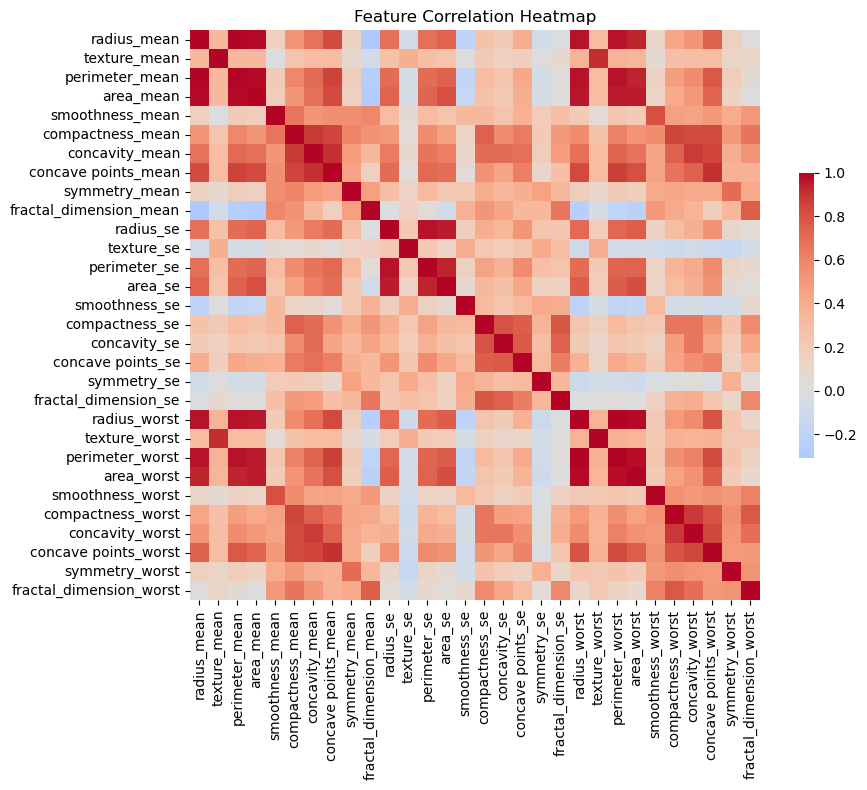

In [77]:
# Correlation matrix
corr = bc_df.drop(columns=["diagnosis"]).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

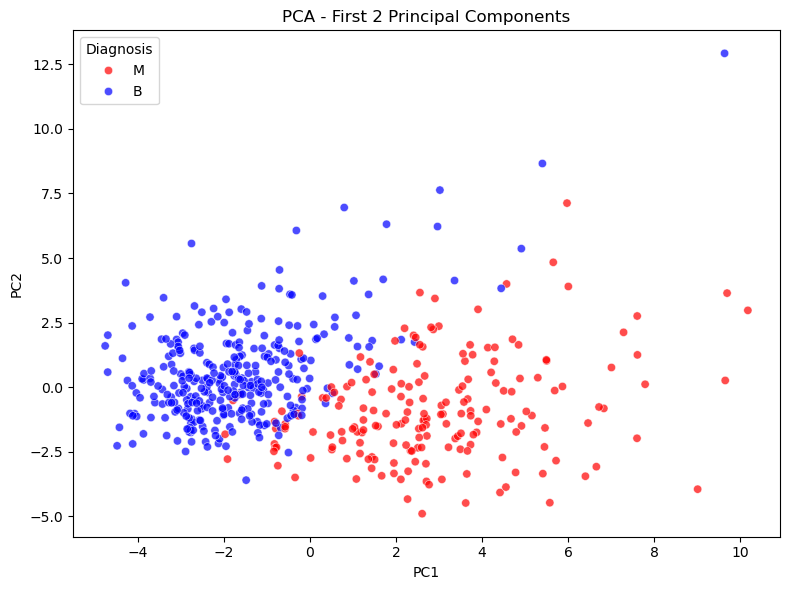

Explained variance by PC1 and PC2: [0.41875304 0.20284262]


In [78]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_bc[feature_columns])

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=scaled_bc['diagnosis'], palette=["red", "blue"], alpha=0.7)
plt.title("PCA - First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Explained variance
print(f"Explained variance by PC1 and PC2: {pca.explained_variance_ratio_}")

### **STEP 10:**
Encoding is required to convert the categorical diagnosis labels (‘B’, ‘M’) into numerical values (0, 1) suitable for machine learning models.

In [79]:
scaled_bc['diagnosis'] = LabelEncoder().fit_transform(scaled_bc['diagnosis'])
print(scaled_bc['diagnosis'].value_counts()) 

diagnosis
0    321
1    191
Name: count, dtype: int64


### **STEP 11:**
Data exportation. 

In [80]:
scaled_bc.to_csv("~/Assignment-2/data/breast_cancer_final_data.csv", index=False)
print("Preprocessing is completed and the final dataset is saved.")

Preprocessing is completed and the final dataset is saved.
